### Step 1: Importing the Relevant Libraries

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

### Step 2: Data Inspection

In [63]:
train = pd.read_csv("train_s3TEQDk.csv")
test = pd.read_csv("test_mSzZ8RL.csv")

In [64]:
train.shape,test.shape

((245725, 11), (105312, 10))

* __We have 245725 rows and 11 columns in Train set whereas Test set has 105312 rows and 10 columns.__

In [65]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [66]:
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [67]:
#ratio of null values
train.isnull().sum()/train.shape[0] *100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

In [68]:
#ratio of null values
test.isnull().sum()/test.shape[0] *100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.890383
Avg_Account_Balance     0.000000
Is_Active               0.000000
dtype: float64

* __We have 12% of missing values in Credit_Product column.__

In [69]:
#categorical features
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 7
Numerical Features in Train Set: 4


In [70]:
#categorical features
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

#numerical features
numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 7
Numerical Features in Test Set: 3


### Step 3: Data Cleaning

In [71]:
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [72]:
test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

* Only Credit_Product have some missing values in the data

__Since the Credit_Product is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column__

In [73]:
#Imputing with Mode
train['Credit_Product']= train['Credit_Product'].fillna(train['Credit_Product'].mode()[0])
test['Credit_Product']= test['Credit_Product'].fillna(test['Credit_Product'].mode()[0])

In [74]:
train['Credit_Product'].isnull().sum(),test['Credit_Product'].isnull().sum()

(0, 0)

In [75]:
train.isnull().sum(),test.isnull().sum()

(ID                     0
 Gender                 0
 Age                    0
 Region_Code            0
 Occupation             0
 Channel_Code           0
 Vintage                0
 Credit_Product         0
 Avg_Account_Balance    0
 Is_Active              0
 Is_Lead                0
 dtype: int64, ID                     0
 Gender                 0
 Age                    0
 Region_Code            0
 Occupation             0
 Channel_Code           0
 Vintage                0
 Credit_Product         0
 Avg_Account_Balance    0
 Is_Active              0
 dtype: int64)

__We have succesfully imputed the missing values from the column Credit_Product.__

### Step 4: Exploratory Data Analysis

In [76]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [77]:
train['Gender'].value_counts()

Male      134197
Female    111528
Name: Gender, dtype: int64

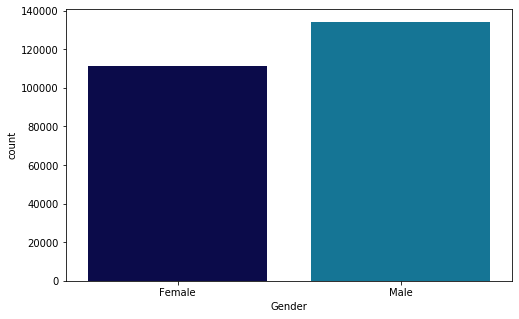

In [78]:
plt.figure(figsize=(8,5))
sns.countplot('Gender',data=train,palette='ocean')

__The Number of Male Customers is more as compared to Female.__

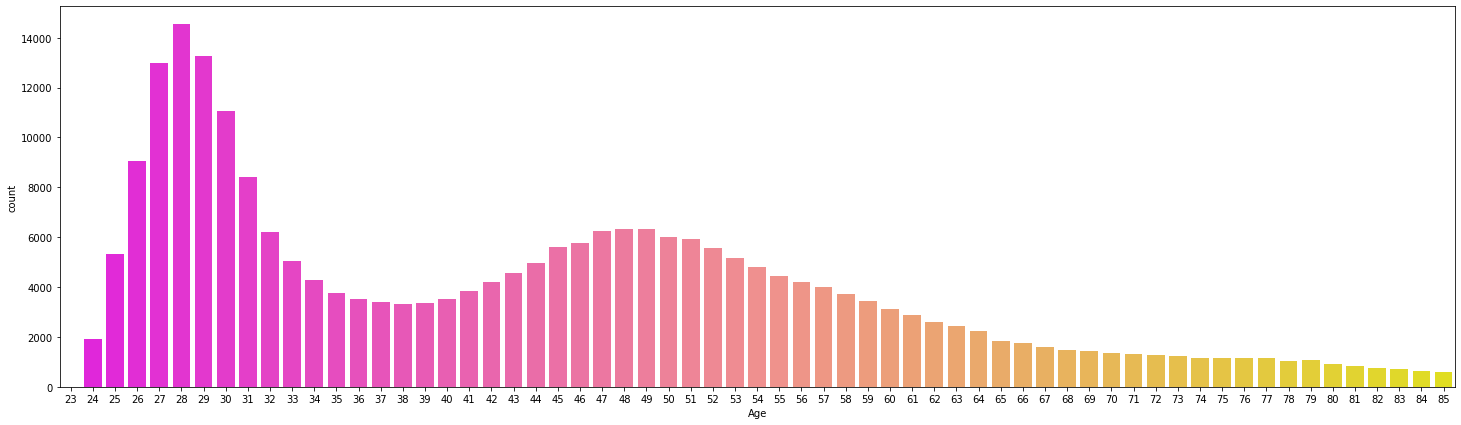

In [79]:
plt.figure(figsize=(25,7))
sns.countplot('Age',data=train,palette='spring')

__The Number of Customers are more in the age range between 26 to 31 yrs .__

In [80]:
train.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

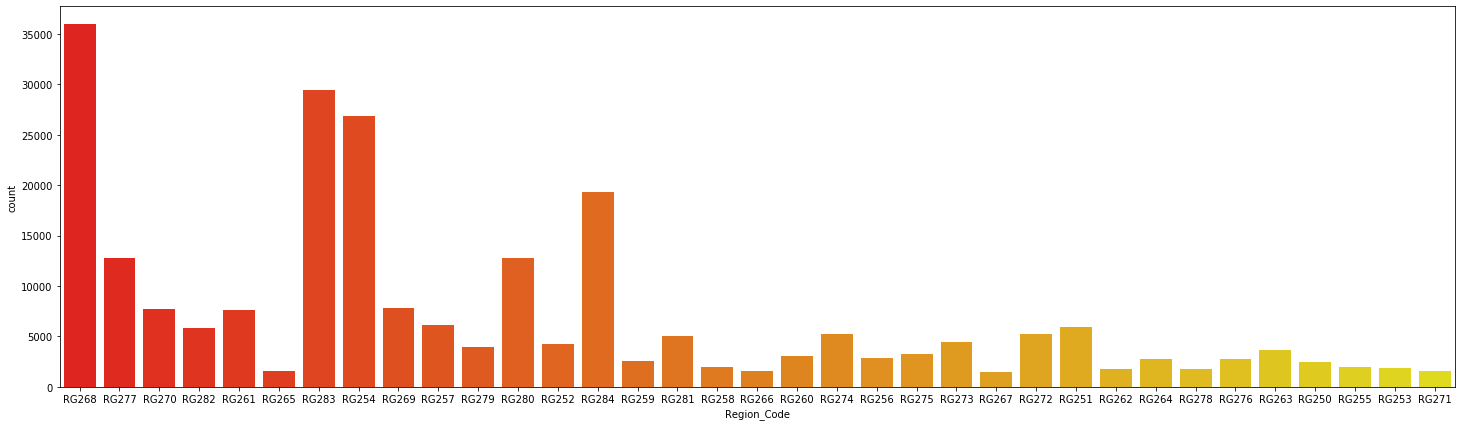

In [81]:
plt.figure(figsize=(25,7))
sns.countplot('Region_Code',data=train,palette='autumn')

__Regions RG268,RG283,RG254 & RG284 have more customers as compared to other regions.__

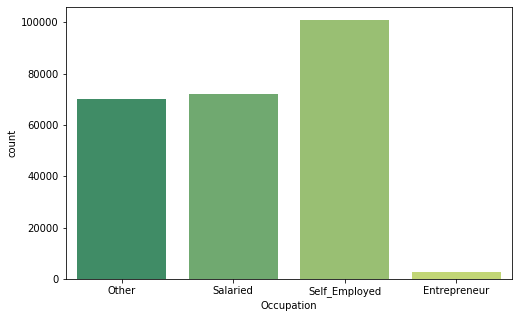

In [82]:
plt.figure(figsize=(8,5))
sns.countplot('Occupation',data=train,palette='summer')

__Maximum Customers are Self Employed.__

In [83]:
train['Channel_Code'].value_counts()

X1    103718
X3     68712
X2     67726
X4      5569
Name: Channel_Code, dtype: int64

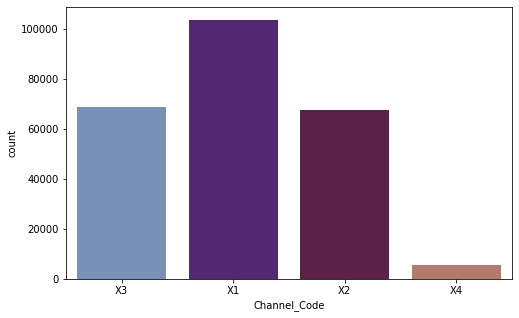

In [84]:
plt.figure(figsize=(8,5))
sns.countplot('Channel_Code',data=train,palette='twilight')

__Maximum Customers are acquired through 'X1' Channel Code.__

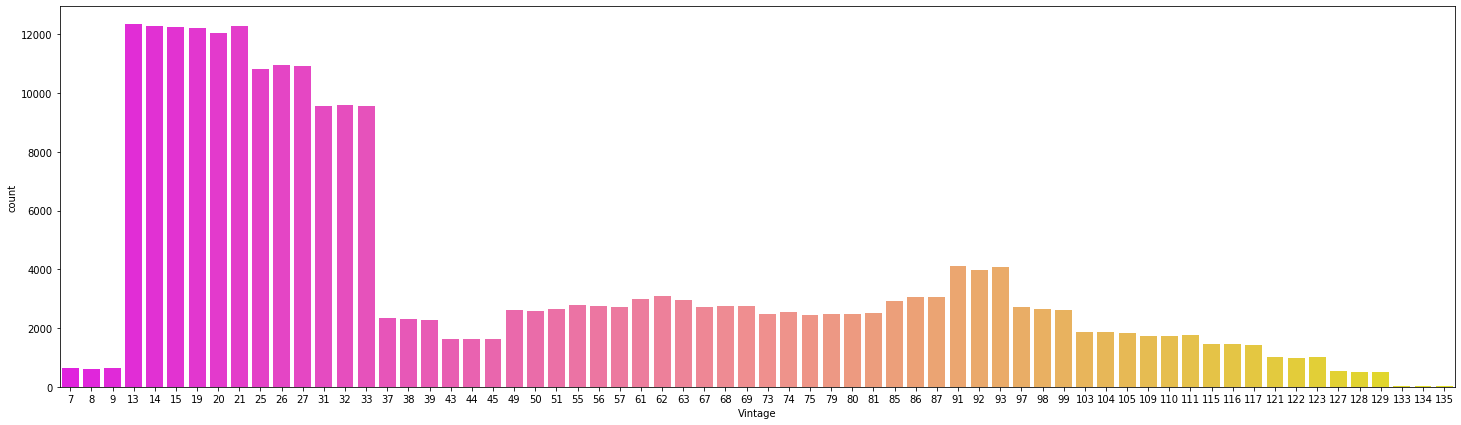

In [85]:
plt.figure(figsize=(25,7))
sns.countplot('Vintage',data=train,palette='spring')

__Most Customers are associated with the bank/entity for 13 to 33 months.__

In [86]:
train['Credit_Product'].value_counts()

No     173682
Yes     72043
Name: Credit_Product, dtype: int64

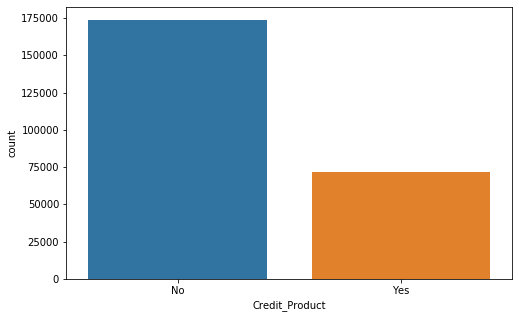

In [87]:
plt.figure(figsize=(8,5))
sns.countplot('Credit_Product',data=train)

__Most Customers don't have any active Credit Product .__

In [88]:
train['Avg_Account_Balance'].value_counts()

4022185    127
1611273     35
4126262     33
1142030     32
936814      31
          ... 
1016388      1
516680       1
1043017      1
784971       1
2760299      1
Name: Avg_Account_Balance, Length: 135292, dtype: int64

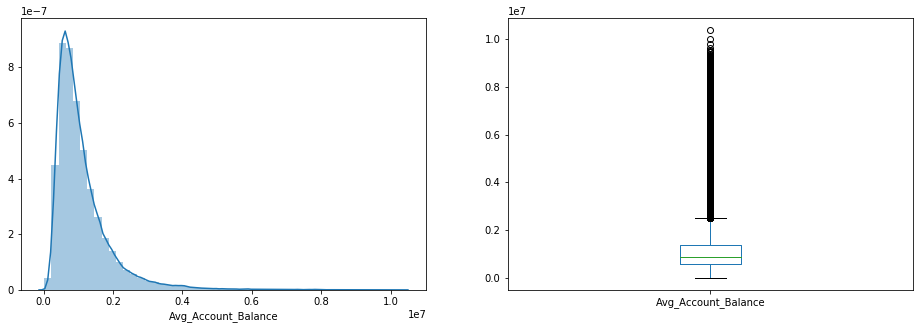

In [89]:
plt.figure(1)
plt.subplot(121) 
sns.distplot(train['Avg_Account_Balance']);
plt.subplot(122) 
train['Avg_Account_Balance'].plot.box(figsize=(16,5))
plt.show()

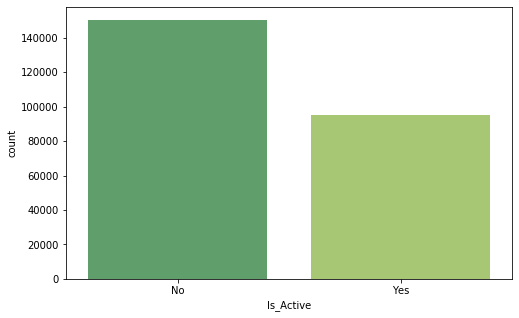

In [90]:
plt.figure(figsize=(8,5))
sns.countplot('Is_Active',data=train,palette='summer')

__Maximum Customers are not active for past 3 months.__

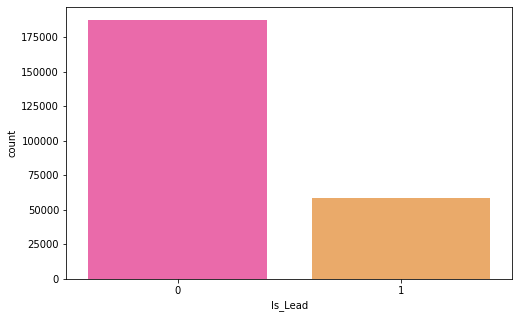

In [91]:
plt.figure(figsize=(8,5))
sns.countplot('Is_Lead',data=train,palette='spring')

__Maximum Customers are not interest in Credit Card.__

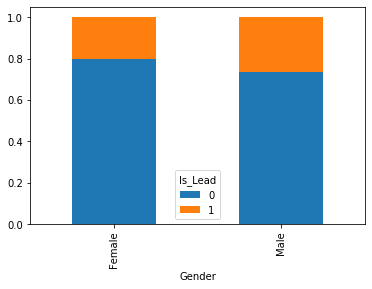

In [93]:
Gender = pd.crosstab(train['Gender'],train['Is_Lead'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

__More Male Customers are interest in Credit Card as compared to Female.__

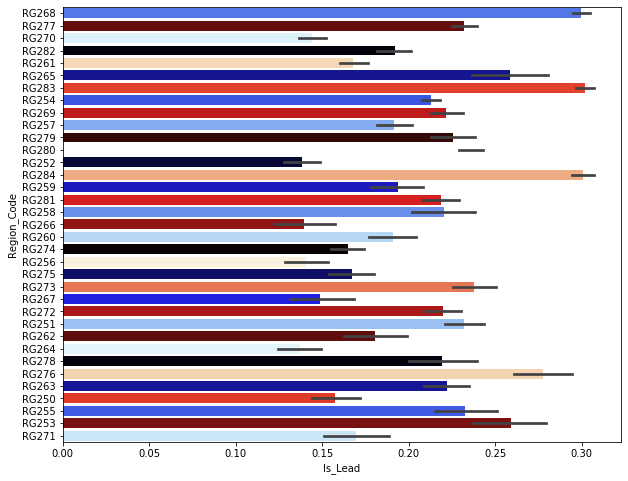

In [94]:
plt.figure(figsize=(10,8))
sns.barplot(y='Region_Code',x='Is_Lead',data=train,palette='flag')

__More Customers are interest in Credit Card from RG268,RG265,RG283,RG284,RG276,RG253.__

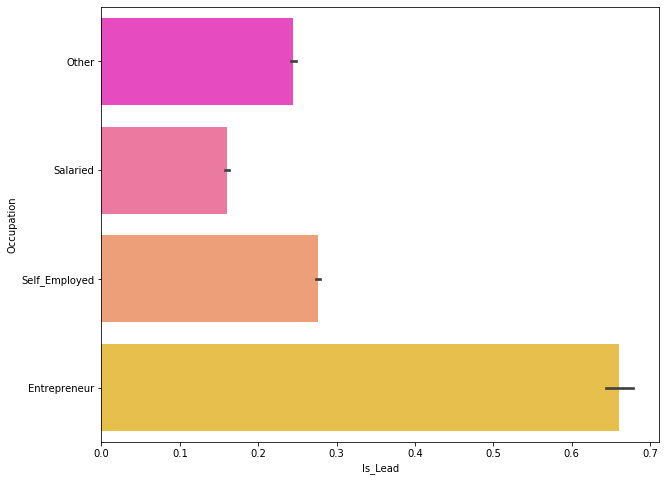

In [95]:
plt.figure(figsize=(10,8))
sns.barplot(y='Occupation',x='Is_Lead',data=train,palette='spring')

__While the number of Customers having 'Entreprener' occupation is less but they are more likely to be interested in Credit cards.__

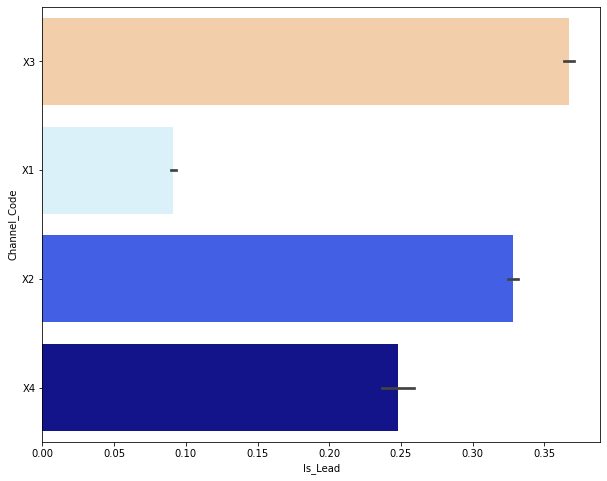

In [96]:
plt.figure(figsize=(10,8))
sns.barplot(y='Channel_Code',x='Is_Lead',data=train,palette='flag')

__Interested Credit Card Customers are acquired through 'X3' Channel Code.__

In [97]:
train.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

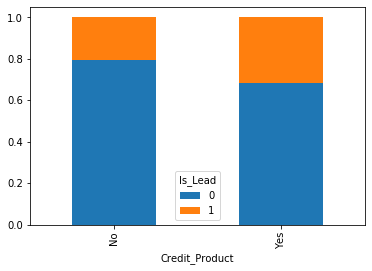

In [98]:
Gender = pd.crosstab(train['Credit_Product'],train['Is_Lead'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

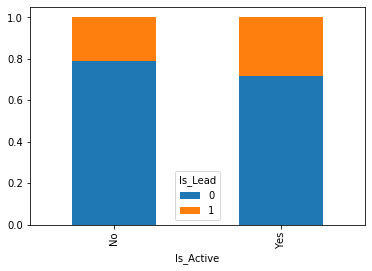

In [99]:
Gender = pd.crosstab(train['Is_Active'],train['Is_Lead'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

### Step 5: Building Model

In [100]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,r2_score,classification_report

In [101]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [102]:
train.drop(['ID'], axis=1, inplace=True)

In [103]:
train.columns

Index(['Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code', 'Vintage',
       'Credit_Product', 'Avg_Account_Balance', 'Is_Active', 'Is_Lead'],
      dtype='object')

In [104]:
# Labelencoding
le = LabelEncoder()
var_mod = train.select_dtypes(include='object').columns
for i in var_mod:
    train[i] = le.fit_transform(train[i])
    
for i in var_mod:
    test[i] = le.fit_transform(test[i])

In [105]:
train.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,73,18,1,2,43,0,1045696,0,0
1,0,30,27,2,0,32,0,581988,0,0
2,0,56,18,3,2,26,0,1484315,1,0
3,1,34,20,2,0,19,0,470454,0,0
4,0,30,32,2,0,33,0,886787,0,0


In [106]:
# Seperate Features and Target
X= train.drop(columns = ['Is_Lead'], axis=1)
y= train['Is_Lead']

In [107]:
# 20% data as validation set
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)

In [109]:
X_train.shape,y_train.shape

((196580, 9), (196580,))

In [114]:
y_valid

127732    0
111308    0
158317    1
234144    0
39335     1
         ..
240674    0
136917    0
70690     0
18362     0
176722    0
Name: Is_Lead, Length: 49145, dtype: int64

## 1. Logistic Regression Model

In [116]:
# Model Building

# Initialzing the model
lreg_model = LogisticRegression()

# Fitting the model with data
lreg_model.fit(X_train, y_train)

# Predicting on test data
y_pred = lreg_model.predict(X_valid)


In [121]:
y_pred_prob = lreg_model.predict_proba(X_valid)[:,1]

In [123]:
roc_auc_score(y_valid,y_pred)

0.5

In [122]:
roc_auc_score(y_valid,y_pred_prob)

0.4491521339872249

## 2. Random Forest Classifier

In [124]:
from sklearn.ensemble import RandomForestClassifier

# Initialzing the model
rf_model = RandomForestClassifier()

# Fitting the model with data
rf_model.fit(X_train, y_train)

# Predicting on test data
y_pred = rf_model.predict(X_valid)

# Evaluating the model
print('----------------ROC Score-------------------')
print(roc_auc_score(y_valid, y_pred))


print("-------------Classification Report -----------------")
print(classification_report(y_pred, y_valid))

----------------ROC Score-------------------
0.6182797857584409
-------------Classification Report -----------------
              precision    recall  f1-score   support

           0       0.92      0.81      0.86     42464
           1       0.32      0.55      0.40      6681

    accuracy                           0.78     49145
   macro avg       0.62      0.68      0.63     49145
weighted avg       0.84      0.78      0.80     49145



Feature ranking:
1. feature Gender (0.314270)
2. feature Age (0.197380)
3. feature Region_Code (0.192807)
4. feature Occupation (0.135203)
5. feature Channel_Code (0.062724)
6. feature Vintage (0.046868)
7. feature Credit_Product (0.019735)
8. feature Avg_Account_Balance (0.016895)
9. feature Is_Active (0.014117)


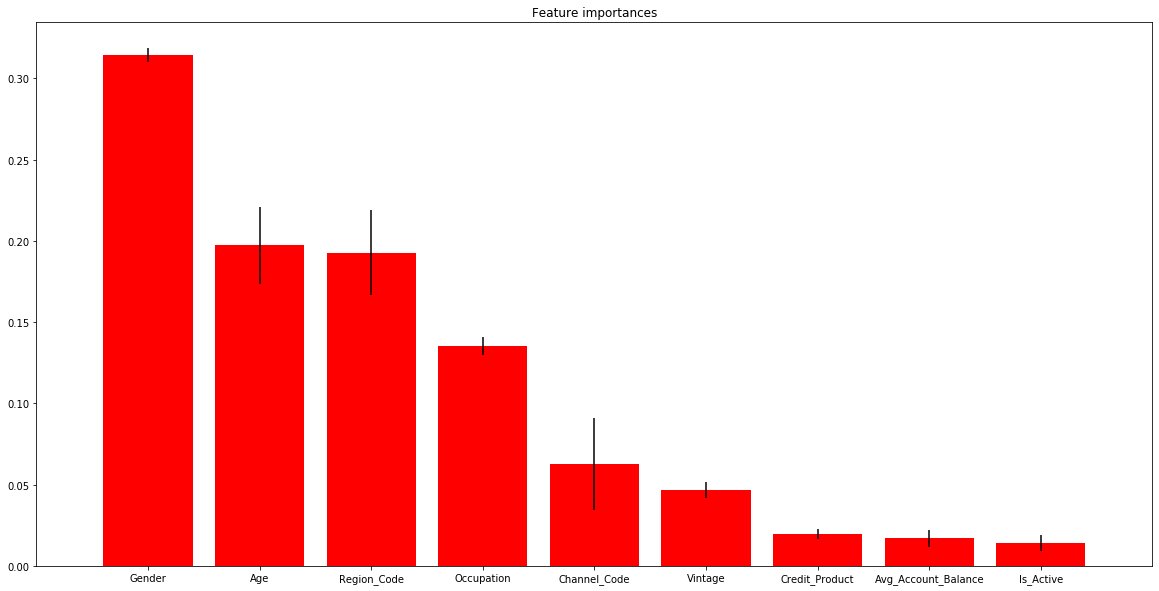

In [129]:
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, list(X_train.columns)[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), list(X_train.columns))
plt.xlim([-1, X_train.shape[1]])
plt.show()

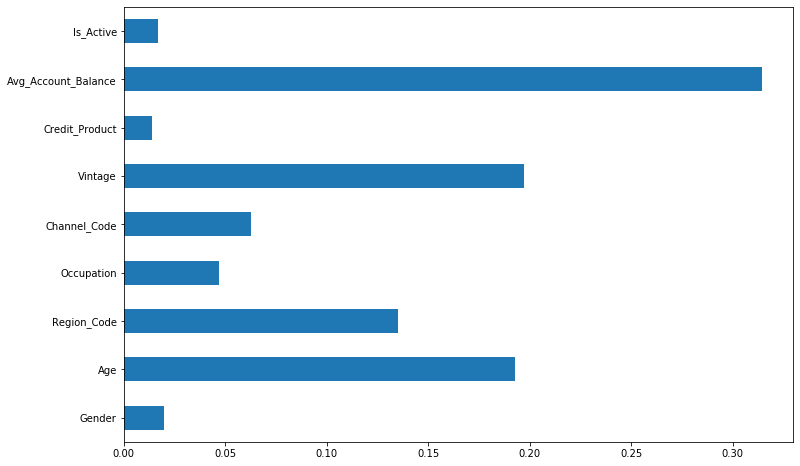

In [145]:
importances = pd.Series(rf_model.feature_importances_,index=X_train.columns)
importances.plot(kind='barh',figsize=(12,8))

In [131]:
y_pred_prob = rf_model.predict_proba(X_valid)[:,1]
roc_auc_score(y_valid, y_pred_prob)

0.7553274384517812

## XG Boost

In [133]:
from xgboost.sklearn import XGBClassifier

# Initialzing the model
xgb_model = XGBClassifier()

# Fitting the model with data
xgb_model.fit(X_train, y_train)

# Predicting on test data
y_pred = xgb_model.predict(X_valid)
y_pred_prob = xgb_model.predict_proba(X_valid)[:,1]

# Evaluating the model
print('----------------ROC Score-------------------')
print(roc_auc_score(y_valid, y_pred))

print('----------------ROC Score Probability-------------------')
print(roc_auc_score(y_valid, y_pred_prob))


print("-------------Classification Report -----------------")
print(classification_report(y_pred, y_valid))

----------------ROC Score-------------------
0.6166490462929617
----------------ROC Score Probability-------------------
0.7856621189212423
-------------Classification Report -----------------
              precision    recall  f1-score   support

           0       0.95      0.81      0.87     43965
           1       0.28      0.64      0.39      5180

    accuracy                           0.79     49145
   macro avg       0.62      0.72      0.63     49145
weighted avg       0.88      0.79      0.82     49145



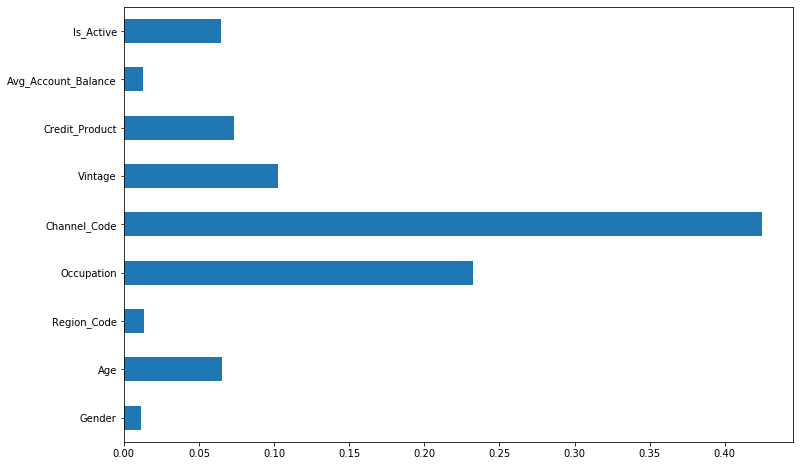

In [144]:
importances = pd.Series(xgb_model.feature_importances_,index=X_train.columns)
importances.plot(kind='barh',figsize=(12,8))

## XGBRFClassifier

In [135]:
from xgboost.sklearn import XGBRFClassifier

# Initialzing the model
xgbrf_model = XGBRFClassifier()

# Fitting the model with data
xgbrf_model.fit(X_train, y_train)

# Predicting on test data
y_pred = xgbrf_model.predict(X_valid)
y_pred_prob = xgbrf_model.predict_proba(X_valid)[:,1]

# Evaluating the model
print('----------------ROC Score-------------------')
print(roc_auc_score(y_valid, y_pred))

print('----------------ROC Score Probability-------------------')
print(roc_auc_score(y_valid, y_pred_prob))


print("-------------Classification Report -----------------")
print(classification_report(y_pred, y_valid))

----------------ROC Score-------------------
0.5696547293060639
----------------ROC Score Probability-------------------
0.7790140353219679
-------------Classification Report -----------------
              precision    recall  f1-score   support

           0       0.98      0.79      0.87     46403
           1       0.16      0.69      0.26      2742

    accuracy                           0.78     49145
   macro avg       0.57      0.74      0.57     49145
weighted avg       0.93      0.78      0.84     49145



In [146]:
submission = pd.read_csv('sample_submission_eyYijxG.csv')
xgb_model.fit(X, y)
final_predictions = xgb_model.predict_proba(test.drop(columns = ['ID'], axis=1))[:,1]
submission['Is_Lead'] = final_predictions
#only positive predictions for the target variable
submission['Is_Lead'] = submission['Is_Lead'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('my_submission3.csv', index=False)